In [15]:
import numpy as np
import argparse
import cv2
from matplotlib import pyplot as plt


In [16]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [17]:
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe("MobileNetSSD_deploy.prototxt.txt", "MobileNetSSD_deploy.caffemodel")


[INFO] loading model...


In [19]:
def parsing_image(img):
    image = cv2.imread(img)
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,
        (300, 300), 127.5)
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > 0:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),
                COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    img2 = image[:,:,::-1]
    plt.imshow(img2)

[INFO] computing object detections...
[INFO] car: 99.48%
[INFO] cat: 57.13%
[INFO] dog: 57.64%
[INFO] horse: 99.85%
[INFO] person: 85.77%


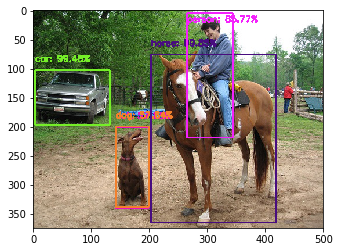

In [20]:
parsing_image("example_05.jpg")

In [ ]:
parsing_image("example_06.jpg")